# Project Fresh
### Finding and Targeting Instacart's Top User Group

This notebook details the approaches and the conclusions of
Project Fresh which aims to find and target Instacart's top consumer group

<b>This notebook covers:</b>
1. Data Cleaning
2. EDA
3. Clustering
3. Recommendations

<b>Our Approach:</b>
1. First step is to find the highest value consumer group using K-Means on previous purchase behavior.
2. After checking for the purity of the groups, we count the # of orders per group and the avg items per order to calculate their value.


<b> Recommendations:</b>


<b> Next Steps:</b>
1. Try Other Algorithms
2. Use Products Instead of Departments
3. Build a Dashboard for automated insights

### Aside from that, I hope you enjoy this notebook!

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Make all my plots 538 Style
plt.style.use('fivethirtyeight')

In [4]:
order_products_train_df = pd.read_csv("../order_products__train.csv")
order_products_prior_df = pd.read_csv("../order_products__prior.csv")
orders_df = pd.read_csv("../orders.csv")
products_df = pd.read_csv("../products.csv")
aisles_df = pd.read_csv("../aisles.csv")
departments_df = pd.read_csv("../departments.csv")

prior_orders = orders_df[orders_df.eval_set == 'prior']

# 1. EDA

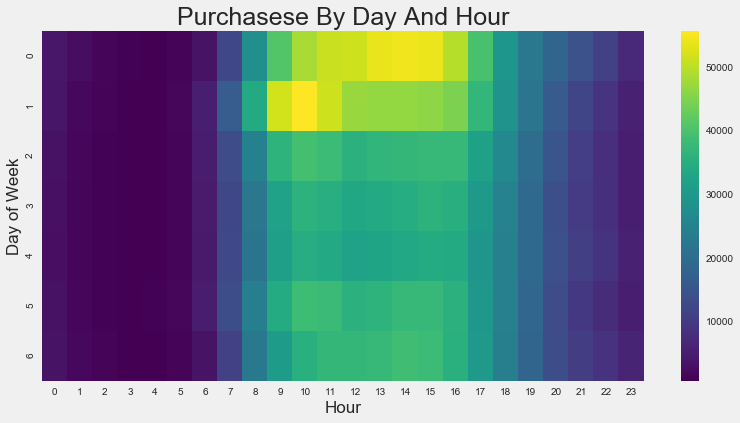

In [250]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap = 'viridis')
plt.title('Purchasese By Day And Hour', size = 25 )
plt.ylabel('Day of Week',size = 17)
_ = plt.xlabel('Hour',size = 17)

<b> Takeaways:</b>
1. There is more orders in the weekends and in between 7 and 6pm.

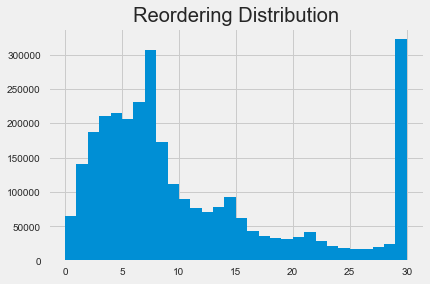

In [255]:
prior_orders.days_since_prior_order.hist(bins = 30)
plt.title('Reordering Distribution')

<b> Takeaways:</b>
1. Folks then to reorder in week or monthly increments.

# 2. Costumer Segmentation

#### Creating a Dataframe to Segment

In [237]:
column_dict = {}
user_col = []
for i in range(1,22):
    column_dict[i] = []

    
print  datetime.now().strftime('%Y-%m-%d %H:%M:%S')

count = 0
for user in set(complete.user_id.head(1000)):
    count += 1
    departments = range(1,22)
    dept_user = set(complete[complete.user_id == user].department_id)
    
    for i in departments:
        if i in dept_user:
            column_dict[i].extend([1])
            
        else:
            column_dict[i].extend([0])
            
    
    user_col.append(user)
    if (count % 1000) == 0:
        print count
        print  datetime.now().strftime('%Y-%m-%d %H:%M:%S')

2018-07-22 19:28:18


In [242]:
clustering = pd.DataFrame(column_dict)

In [258]:
clustering.head()

1   2   3   4   5   6   7   8   9   10 ...  12  13  14  15  16  17  18  19  \
0   1   0   1   1   0   0   1   0   1   0 ...   1   1   0   1   1   0   0   1   
1   1   0   0   1   0   0   0   0   0   0 ...   1   1   0   0   1   0   0   0   
2   1   0   0   1   0   0   1   0   0   0 ...   1   1   0   1   1   1   0   1   
3   1   1   0   1   0   1   1   0   1   0 ...   1   1   0   1   1   1   1   1   
4   1   0   0   1   0   0   1   0   1   0 ...   1   1   0   1   1   0   0   1   

   20  21  
0   0   0  
1   0   0  
2   0   0  
3   1   1  
4   1   0  

[5 rows x 21 columns]

### Implementing K-Means

In [259]:
from sklearn.cluster import KMeans
import numpy as np
X = clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [247]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [248]:
kmeans.labels_

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [249]:
kmeans.cluster_centers_

array([[ 0.86666667,  0.1       ,  0.46666667,  1.        ,  0.        ,
         0.2       ,  0.83333333,  0.03333333,  0.46666667,  0.1       ,
         0.56666667,  0.4       ,  0.93333333,  0.43333333,  0.63333333,
         1.        ,  0.33333333,  0.13333333,  0.9       ,  0.66666667,
         0.4       ],
       [ 1.        ,  0.26086957,  0.97826087,  1.        ,  0.        ,
         0.7826087 ,  0.93478261,  0.17391304,  0.95652174,  0.08695652,
         0.69565217,  0.95652174,  1.        ,  0.89130435,  1.        ,
         1.        ,  0.67391304,  0.26086957,  1.        ,  0.97826087,
         0.45652174]])